In [3]:
#import packages
import pypsa
import pandapower as pp
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import subprocess
from shapely.errors import ShapelyDeprecationWarning
import logging

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("pypsa.pf").setLevel(logging.WARNING)
plt.rc("figure", figsize=(10, 8))

c:\Users\suhas\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [4]:
# Create a new PyPSA network
network = pypsa.Network()
network.set_snapshots(range(1))  # Solve for a year 365*24

In [5]:
type(network)

pypsa.components.Network

In [6]:
# Read excel file which contains Non renewable generators data
bus=pd.read_excel('data_exercise.xlsx',sheet_name='buses',header=0)

c:\Users\suhas\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

c:\Users\suhas\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [7]:
#read bus file to verify the code
bus

,bus,v_nom,carrier,x,y
0,north_de,380,AC,53.558119,9.598188
1,east_de,380,AC,52.205416,9.754593
2,west_de,380,AC,52.598466,9.101421


In [8]:
#add buses to the network

network.madd(
    "Bus",
    names= bus.bus,
    bus=list(bus.v_nom),
    carrier=list(bus.carrier),
    x=list(bus.x),
    y=list(bus.y),
)
network.buses

C:\Users\suhas\AppData\Local\Temp\ipykernel_16988\1741324144.py:3: DeprecatedWarning:

madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.

Index(['north_de', 'east_de', 'west_de'], dtype='object', name='bus')


,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network,bus
Bus,,,,,,,,,,,,,
north_de,1.0,,53.558119,9.598188,AC,,1.0,0.0,inf,PQ,,,380
east_de,1.0,,52.205416,9.754593,AC,,1.0,0.0,inf,PQ,,,380
west_de,1.0,,52.598466,9.101421,AC,,1.0,0.0,inf,PQ,,,380


In [9]:
# Read excel file which contains Non generators data
generators=pd.read_excel('data_exercise.xlsx',sheet_name='generators')

c:\Users\suhas\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



c:\Users\suhas\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [10]:
#read the generators file
generators

,generator,p_nom,p_nom_max,bus,p_nom_extendable,marginal_cost
0,gen_no1,15,NaN,north_de,False,10
1,gen_no2,16,NaN,north_de,False,15
2,gen_no3,9,NaN,north_de,False,30
3,gen_ost1,10,NaN,east_de,False,15
4,gen_ost2,9,NaN,east_de,False,20
5,gen_ost3,5,NaN,east_de,False,35
6,gen_west1,30,NaN,west_de,False,25
7,gen_west2,10,NaN,west_de,False,40
8,gen_west3,15,NaN,west_de,False,45


In [11]:
#add generators to the network

network.madd(
    "Generator",
    names= generators.generator,
    bus=list(generators.bus),
    carrier=list(generators.generator),
    p_nom=list(generators.p_nom),  # GW
    p_nom_extendable=list(generators.p_nom_extendable),
    marginal_cost=list(generators.marginal_cost),
)
network.generators

C:\Users\suhas\AppData\Local\Temp\ipykernel_16988\1756491760.py:3: DeprecatedWarning:

madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.



,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,e_sum_min,e_sum_max,q_set,sign,carrier,marginal_cost,marginal_cost_quadratic,active,build_year,lifetime,capital_cost,efficiency,committable,start_up_cost,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
gen_no1,north_de,PQ,,15.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_no1,10.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_no2,north_de,PQ,,16.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_no2,15.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_no3,north_de,PQ,,9.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_no3,30.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost1,east_de,PQ,,10.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_ost1,15.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost2,east_de,PQ,,9.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_ost2,20.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost3,east_de,PQ,,5.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_ost3,35.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west1,west_de,PQ,,30.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_west1,25.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west2,west_de,PQ,,10.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_west2,40.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west3,west_de,PQ,,15.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_west3,45.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [12]:
#read generatores in network
network.generators

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,e_sum_min,e_sum_max,q_set,sign,carrier,marginal_cost,marginal_cost_quadratic,active,build_year,lifetime,capital_cost,efficiency,committable,start_up_cost,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
gen_no1,north_de,PQ,,15.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_no1,10.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_no2,north_de,PQ,,16.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_no2,15.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_no3,north_de,PQ,,9.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_no3,30.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost1,east_de,PQ,,10.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_ost1,15.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost2,east_de,PQ,,9.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_ost2,20.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost3,east_de,PQ,,5.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_ost3,35.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west1,west_de,PQ,,30.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_west1,25.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west2,west_de,PQ,,10.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_west2,40.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west3,west_de,PQ,,15.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_west3,45.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [13]:
# add load
# Read excel file which contains Non renewable generators data
load=pd.read_excel('data_exercise.xlsx',sheet_name='load',header=0)

c:\Users\suhas\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

c:\Users\suhas\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [14]:
#read load
load

,bus,p_set,carrier
0,north_de,10,AC
1,east_de,10,AC
2,west_de,40,AC


In [15]:
#add laod to the network

network.madd(
    "Load",
    names= load.bus,
    bus=list(load.bus),
    p_set=list(load.p_set),  # GW
) 
network.loads


C:\Users\suhas\AppData\Local\Temp\ipykernel_16988\1225564043.py:3: DeprecatedWarning:

madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.



,bus,carrier,type,p_set,q_set,sign,active
Load,,,,,,,
north_de,north_de,,,10.0,0.0,-1.0,True
east_de,east_de,,,10.0,0.0,-1.0,True
west_de,west_de,,,40.0,0.0,-1.0,True


In [16]:
#add transmission lines
# Read excel file which contains Non renewable generators data
lines=pd.read_excel('data_exercise.xlsx',sheet_name='Trans lines',header=0)

c:\Users\suhas\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

c:\Users\suhas\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [17]:
lines.head()

,bus0,bus1,s_nom,s_nom_extendable,length
0,north_de,east_de,50,True,400
1,east_de,west_de,50,True,400
2,west_de,north_de,50,True,400


In [ ]:
# Add trans line connection between the buses
for index, row in lines.iterrows():
    network.add(
        "Line",
        "{}_{}".format(row['bus0'],row['bus1']),
        bus0=row['bus0'],
        bus1=row['bus1'],
        s_nom=row['s_nom'],
        x=1,
    )

In [19]:
network.lines

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,s_nom_min,s_nom_max,s_max_pu,capital_cost,active,build_year,lifetime,length,carrier,terrain_factor,num_parallel,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
north_de_east_de,north_de,east_de,,1.0,0.0,0.0,0.0,50.0,0.0,False,0.0,inf,1.0,0.0,True,0,inf,0.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
east_de_west_de,east_de,west_de,,1.0,0.0,0.0,0.0,50.0,0.0,False,0.0,inf,1.0,0.0,True,0,inf,0.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
west_de_north_de,west_de,north_de,,1.0,0.0,0.0,0.0,50.0,0.0,False,0.0,inf,1.0,0.0,True,0,inf,0.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#solve using highs solver
network.optimize(solver_name='highs')

Index(['gen_no1', 'gen_no2', 'gen_no3', 'gen_ost1', 'gen_ost2', 'gen_ost3',
       'gen_west1', 'gen_west2', 'gen_west3'],
      dtype='object', name='Generator')
Index(['north_de', 'east_de', 'west_de'], dtype='object', name='Bus')
Index(['north_de', 'east_de', 'west_de'], dtype='object', name='Bus')
Index(['north_de_east_de', 'east_de_west_de', 'west_de_north_de'], dtype='object', name='Line')
Index(['north_de_east_de', 'east_de_west_de', 'west_de_north_de'], dtype='object', name='Line')
Index(['gen_no1', 'gen_no2', 'gen_no3', 'gen_ost1', 'gen_ost2', 'gen_ost3',
       'gen_west1', 'gen_west2', 'gen_west3'],
      dtype='object', name='Generator')
Index(['north_de', 'east_de', 'west_de'], dtype='object', name='Bus')
Index(['north_de', 'east_de', 'west_de'], dtype='object', name='Bus')
Index(['north_de_east_de', 'east_de_west_de', 'west_de_north_de'], dtype='object', name='Line')
Index(['north_de_east_de', 'east_de_west_de', 'west_de_north_de'], dtype='object', name='Line')
c:\Users\s

('ok', 'optimal')

In [21]:
#vusualization of results
network.buses_t.marginal_price

Bus,north_de,east_de,west_de
snapshot,,,
0,25.0,25.0,25.0


In [22]:
clearing_price_redisp = network.buses_t.marginal_price.iloc[0].max()
clearing_price_redisp

25.0

c:\Users\suhas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning:

backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.

c:\Users\suhas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning:

backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.

c:\Users\suhas\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning:

backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.



<Axes: xlabel='Generator', ylabel='MW'>

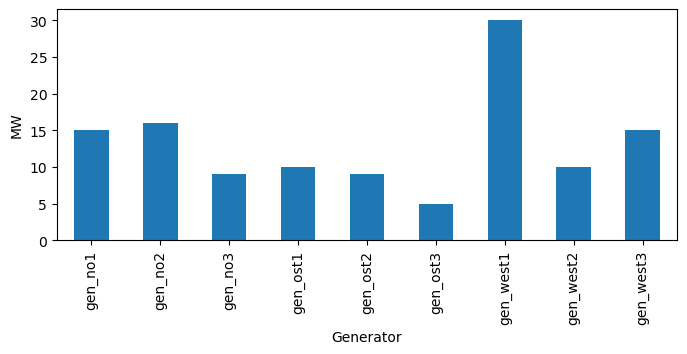

In [23]:
network.generators.p_nom_opt.plot.bar(ylabel="MW", figsize=(8, 3))

In [24]:
network.generators.p_nom_opt

Generator
gen_no1      15.0
gen_no2      16.0
gen_no3       9.0
gen_ost1     10.0
gen_ost2      9.0
gen_ost3      5.0
gen_west1    30.0
gen_west2    10.0
gen_west3    15.0
Name: p_nom_opt, dtype: float64

<Axes: xlabel='Generator', ylabel='MW'>

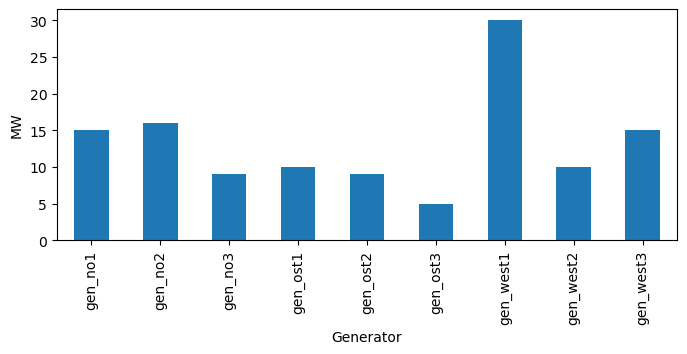

In [25]:
network.generators.p_nom_opt.plot.bar(ylabel="MW", figsize=(8, 3))

In [26]:
network.lines_t.p0

Line,north_de_east_de,east_de_west_de,west_de_north_de
snapshot,,,
0,4.0,13.0,-17.0


In [27]:
gen = network.generators.assign(g=network.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()
gen

bus       carrier  
east_de   gen_ost1     10.0
          gen_ost2      9.0
          gen_ost3      0.0
north_de  gen_no1      15.0
          gen_no2      16.0
          gen_no3       0.0
west_de   gen_west1    10.0
          gen_west2     0.0
          gen_west3     0.0
Name: g, dtype: float64

In [28]:
flow = pd.Series(10, index=network.branches().index)
flow

component  name            
Line       north_de_east_de    10
           east_de_west_de     10
           west_de_north_de    10
dtype: int64

In [29]:
plot_graph=network.plot(
    bus_sizes=gen/10,
    bus_colors={"Germany Wind":"midnightblue","Germany Coal": "black", "Germany Gas": "gray","France Gas":"gray","France Wind":"midnightblue","France Hydro":"cyan","Belgium Solar":"yellow","Belgium Gas":"gray"},
    margin=1,
    line_widths=3,
    link_widths=0,
    flow=flow,
    color_geomap=True,
    projection=ccrs.EqualEarth(),
    line_colors=network.lines_t.p0.mean().abs(),
)
plt.colorbar(plot_graph[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

c:\Users\suhas\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning:

ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead

c:\Users\suhas\anaconda3\Lib\ast.py:587: DeprecationWarning:

Attribute s is deprecated and will be removed in Python 3.14; use value instead

c:\Users\suhas\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning:

ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead

c:\Users\suhas\anaconda3\Lib\ast.py:587: DeprecationWarning:

Attribute s is deprecated and will be removed in Python 3.14; use value instead



NameError: name 'ccrs' is not defined